<a href="https://colab.research.google.com/github/thiagodemelosilva/Imersao_Dados_4_Alura/blob/main/Imersao_dados_4_aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUÇÃO
Neste notebook uma base de dados retirada do Kaggle sobre imóveis à venda na cidade de São Paulo é utilizada pra exercitar conceitos de exploração de dados com python como:


*   Criação e manipulação de Data Framas utilizando Pandas
*   Uso do Pandas na análise exploratória de dados através métodos e gráficos.

Os desafios abaixo foram feitos como forma de exercitar estes conceitos.

Desafios:

1 - Realizar a média da metragem para cara um dos bairros (Paulo)

2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

4 - Pegar outros estatísticas dos dados, média, mediana, min, max (Vivi)

5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

In [ ]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
df = pd.read_csv(url)
pd.options.display.float_format = '{:.2f}'.format #Floats com 2 casa decimais
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


# Desafio 1
1- Realizar a média da metragem para cara um dos bairros (Paulo)

In [ ]:
df_media_bairros = df.groupby('Bairro').mean() #Agrupando por bairros e calculando a média dos valores numéricos
metragem_bairros = df_media_bairros["Metragem"].round()
metragem_bairros

Bairro
Aclimação           253.00
Alto da Boa Vista   419.00
Alto da Lapa        294.00
Alto da Mooca       270.00
Alto de Pinheiros   433.00
                     ...  
Vila Água Funda     152.00
Água Branca         191.00
Água Fria           165.00
Água Funda          139.00
Água Rasa           340.00
Name: Metragem, Length: 701, dtype: float64

# Desafio 2
2- 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

In [ ]:
#Utilizando uma série boleana pra filtrar o dataframe
df.loc[df["Bairro"] == "Aclimação"]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
269,"Rua Ximbó, 410",Aclimação,São Paulo,140,4,3,4,R$ 800.000
670,"Rua Alabastro, 151",Aclimação,São Paulo,129,3,2,3,R$ 960.000
1265,Rua Carlos Chagas,Aclimação,São Paulo,280,3,2,2,R$ 2.200.000
1287,Rua Doutor João Maia,Aclimação,São Paulo,380,3,5,2,R$ 2.660.000
1347,Rua Doutor João Maia,Aclimação,São Paulo,385,3,5,2,R$ 2.660.000
...,...,...,...,...,...,...,...,...
9260,"Rua Doutor Rafael Caramuru Lanzelloti, 77",Aclimação,São Paulo,120,3,2,1,R$ 900.001
9366,Rua Baturité,Aclimação,São Paulo,156,3,4,1,R$ 800.000
9418,Rua André Gouveia,Aclimação,São Paulo,199,3,4,3,R$ 1.930.000
9539,Rua Rubi,Aclimação,São Paulo,1500,4,2,6,R$ 5.000.000


In [ ]:
#Método .isin pode ser utilizado para iterar por uma lista de valores
bairros = ['Aclimação', 'Alto de Pinheiros', 'Vila Mariana']
df.loc[df["Bairro"].isin(bairros)]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
83,"Rua Carlos Rath, 103",Alto de Pinheiros,São Paulo,400,5,4,4,R$ 2.900.000
84,NaN,Alto de Pinheiros,São Paulo,358,4,4,4,R$ 3.500.000
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
137,"Rua Aquiramun, 94",Alto de Pinheiros,São Paulo,450,5,6,5,R$ 5.500.000
...,...,...,...,...,...,...,...,...
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9776,Rua Oscar Guanabarino,Aclimação,São Paulo,300,3,3,3,R$ 7.000\n /Mês
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000
9852,Rua França Pinto,Vila Mariana,São Paulo,280,3,3,4,R$ 1.600.000


In [ ]:
#Método interessante para strings e eventual manipulação
df.loc[df['Bairro'].str.contains('Vila', na=False)]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,R$ 585.000
10,"Rua Vigário João Álvares, 66",Vila Monumento,São Paulo,261,4,4,3,R$ 700.000
12,"Rua Tuim, 449",Vila Uberabinha,São Paulo,193,3,3,2,R$ 2.500.000
16,Rua João Tauler,Vila Nova,São Paulo,180,4,2,4,R$ 420.000
19,"Avenida Antônio Joaquim de Moura Andrade, 294",Vila Nova Conceição,São Paulo,605,3,3,4,R$ 4.190.000
...,...,...,...,...,...,...,...,...
10001,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,R$ 960.000
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


# Desafio 3
3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

Metragem        AxesSubplot(0.125,0.125;0.168478x0.755)
Quartos      AxesSubplot(0.327174,0.125;0.168478x0.755)
Banheiros    AxesSubplot(0.529348,0.125;0.168478x0.755)
Vagas        AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

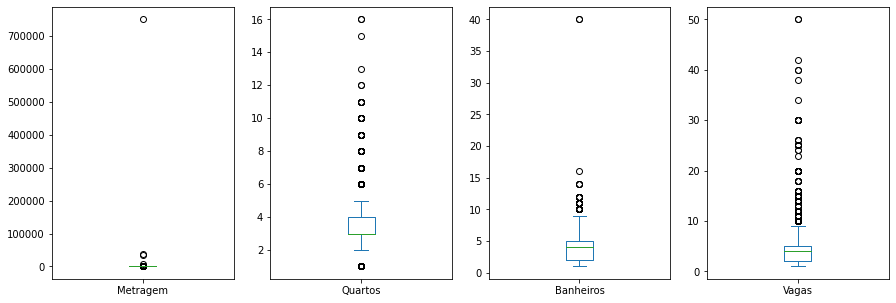

In [ ]:
#Começamos com Boxplots pra a distribuição geral dos dados.
df.plot(kind='box', subplots=True, figsize=(15,5))

Considerando os diagramas de caixa acima podemos ver que temos vários outliers 
e será preciso posteriormente definir como tratá-los nos próximos passos desse estudo


---

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4ed81aa90>,
      dtype=object)

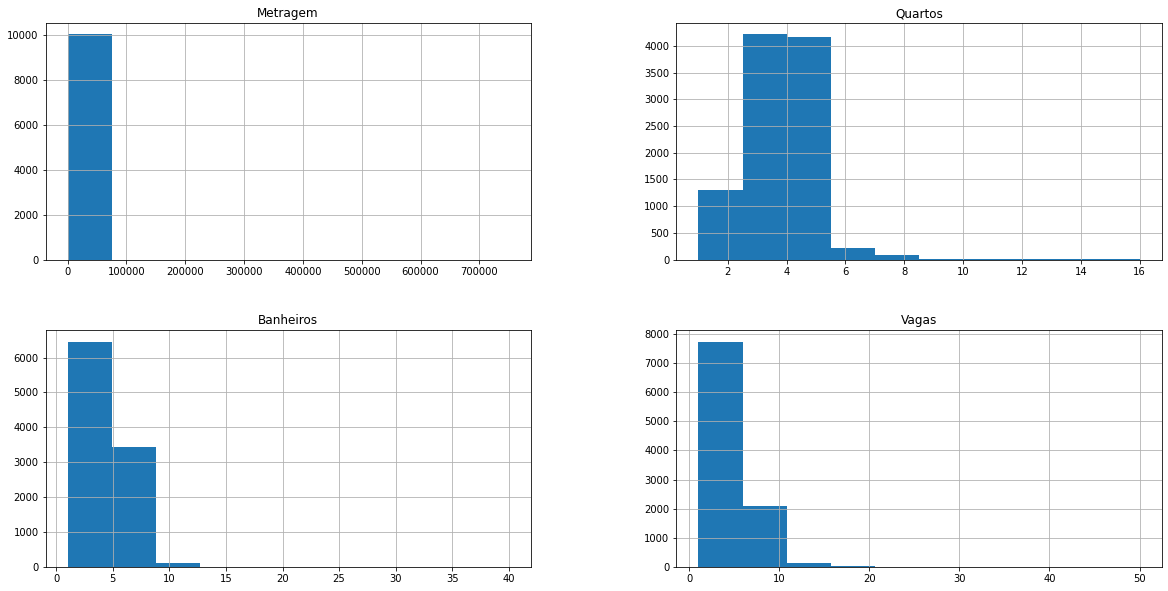

In [ ]:
#Podemos ver a freqêuncia de ocorrência desse valores com histogramas
df.hist(figsize=(20,10))

Podemos ver que os outliers realmente prejudicam um melhor entendimento de como estão distribuídos a maioria dos dados.

---



Os limites de metragem considerados foram:  -257.875  até  891.125 .
Número de apartametne reduzido de  10008  para  9549 .


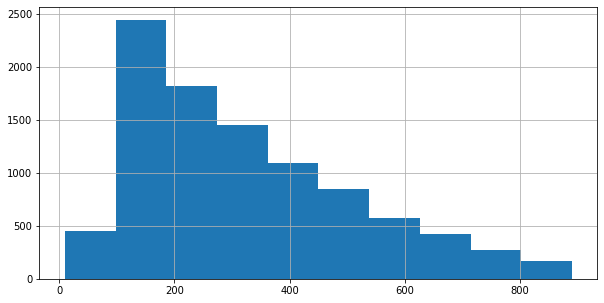

In [ ]:
#Poderíamos remover alguns valores para tentar melhor visualizar a metragem dos bairros

q1, q3 = df['Metragem'].quantile([0.25, 0.75])  #Quartils para cáculor do IQR e limites
IQR = q3 - q1
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR
print('Os limites de metragem considerados foram: ', lower_limit, ' até ', upper_limit, '.')
metragem_limitada = df.loc[(df['Metragem'] > lower_limit) & (df['Metragem']< upper_limit)] #filtragem dos dados
metragem_limitada['Metragem'].hist(figsize=(10, 5))
print('Número de apartamentos reduzido de ', df.shape[0], ' para ', metragem_limitada.shape[0], '.')

Percebemos que retirando uma quantidade menor que 5% dos apartamentos maiores podemos ter um entendimento melhor que como está distribuída a metragem dos imóveis disponíveis.

*Não sei se o método utilizado é bom e outros métodos pra tratar outliers e os dados como um todo serão abordados ao longo do desafio.

---






#Desafio 4
4 - Pegar outros estatísticas dos dados, média, mediana, min, max (Vivi)

In [ ]:
#Primeiro vamos entender o range de alguns dos nossos valores
df_min = df[['Metragem', 'Quartos', 'Banheiros', 'Vagas']].min().rename('Min')
df_max = df[['Metragem', 'Quartos', 'Banheiros', 'Vagas']].max().rename('Max')
df_min_max =  pd.concat([df_min, df_max], axis=1)
df_min_max

,Min,Max
Metragem,10,750000
Quartos,1,16
Banheiros,1,40
Vagas,1,50


In [ ]:
#Agrupando outros valores por bairro em um novo dataframe
df_media_bairros = df.groupby('Bairro').mean()
df_mediana_bairros = df.groupby('Bairro').median()
df_min_bairros = df.groupby('Bairro')['Metragem', 'Quartos', 'Banheiros', 'Vagas'].min()
df_max_bairros = df.groupby('Bairro')['Metragem', 'Quartos', 'Banheiros', 'Vagas'].max()
df_estatisticas_imoveis_bairros = pd.concat([df_media_bairros, df_mediana_bairros, df_min_bairros, df_max_bairros], axis=1) #juntando tudo em um único dataframe

#Novos nomes para as colunas
nomes_colunas = ['Metragem(Média)', 'Quartos(Média)', 'Banheiros(Média)', 'Vagas(Média)', 
                 'Metragem(Mediana)', 'Quartos(Mediana)', 'Banheiros(Mediana)', 'Vagas(Mediana)',
                 'Metragem(Min)', 'Quartos(Min)', 'Banheiros(Min)', 'Vagas(Min)',
                 'Metragem(Max)', 'Quartos(Max)', 'Banheiros(Max)', 'Vagas(Max)']

df_estatisticas_imoveis_bairros.columns = nomes_colunas
df_estatisticas_imoveis_bairros

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,Metragem(Média),Quartos(Média),Banheiros(Média),Vagas(Média),Metragem(Mediana),Quartos(Mediana),Banheiros(Mediana),Vagas(Mediana),Metragem(Min),Quartos(Min),Banheiros(Min),Vagas(Min),Metragem(Max),Quartos(Max),Banheiros(Max),Vagas(Max)
Bairro,,,,,,,,,,,,,,,,
Aclimação,253.06,3.32,3.08,2.91,227.50,3.00,3.00,3.00,104,2,1,1,1500,6,7,8
Alto da Boa Vista,418.88,4.12,5.12,4.62,378.00,4.00,5.50,4.00,315,4,3,3,595,5,7,7
Alto da Lapa,294.34,3.15,3.79,3.91,255.00,3.00,4.00,4.00,46,1,1,1,1133,5,8,12
Alto da Mooca,270.05,3.30,2.60,3.65,182.50,3.00,2.00,4.00,84,2,1,1,805,6,7,6
Alto de Pinheiros,433.44,3.94,4.84,5.00,412.00,4.00,5.00,4.00,100,2,1,1,1530,7,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,143.00,2.00,2.00,2.00,90,2,2,2,200,5,3,4
Água Branca,191.00,3.15,3.08,2.46,174.00,3.00,3.00,2.00,91,2,1,1,400,4,5,7
Água Fria,165.42,2.83,3.42,2.50,174.50,3.00,4.00,2.00,60,2,1,2,314,4,5,5


#Desafio 5
5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

In [ ]:
df_bairro_rua_na = df[df["Rua"].isna()]["Bairro"].drop_duplicates()
df_bairro_rua_na

3                         Jardim Morumbi
11                      Jardim Luzitânia
31                        Parque da Lapa
56      Chácara Santo Antônio (Zona Sul)
57                        Jardim Guedala
                      ...               
9672                 Jardim Vila Formosa
9774                              Cupecê
9780                    Jardim Itacolomi
9816                           Água Rasa
9917                Parque Alves de Lima
Name: Bairro, Length: 394, dtype: object